In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from collections import namedtuple
from analysis_tools import getobjdata
import ctables

import matplotlib.ticker as ticker
from matplotlib.offsetbox import AnchoredText
import time as timeit

import scipy.ndimage as ndimage
import matplotlib.colors as mcolors

from colormaps import radar_colormap

#from Plot_tools import *
from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

from tools.cbook import pickle2Obj

_nthreads = 2

# draw filled contours.
clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]

cmap_data = [(1.0, 1.0, 1.0),
         (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
         (0.0, 1.0, 1.0),
         (0.0, 0.8784313797950745, 0.501960813999176),
         (0.0, 0.7529411911964417, 0.0),
         (0.501960813999176, 0.8784313797950745, 0.0),
         (1.0, 1.0, 0.0),
         (1.0, 0.6274510025978088, 0.0),
         (1.0, 0.0, 0.0),
         (1.0, 0.125490203499794, 0.501960813999176),
         (0.9411764740943909, 0.250980406999588, 1.0),
         (0.501960813999176, 0.125490203499794, 1.0),
         (0.250980406999588, 0.250980406999588, 1.0),
         (0.125490203499794, 0.125490203499794, 0.501960813999176),
         (0.125490203499794, 0.125490203499794, 0.125490203499794),
         (0.501960813999176, 0.501960813999176, 0.501960813999176),
         (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
         (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
         (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
         (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
         (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)
models = {}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
models['wrf'] = pickle2Obj('object_stat/wrf_squall_3km_obj.pkl', retObj=False)
models['cm1'] = pickle2Obj('object_stat/cm1_squall_3km_obj.pkl',retObj=False)
models['solo'] = pickle2Obj('object_stat/solo_squall_3km_obj.pkl',retObj=False)

In [3]:
zh = [0.01073497, 0.04024141, 0.08258476, 0.1361145, 0.2023856, 0.2813303,
    0.372868, 0.4769054, 0.5933367, 0.7220436, 0.8628909, 1.015673, 1.180161,
    1.356162, 1.543466, 1.740841, 1.945226, 2.154314, 2.368158, 2.587233,
    2.811645, 3.0415, 3.276904, 3.517966, 3.764791, 4.017487, 4.276159,
    4.540912, 4.811849, 5.08907, 5.372672, 5.662747, 5.959383, 6.262661,
    6.572655, 6.889427, 7.213032, 7.543508, 7.880885, 8.225174, 8.576372,
    8.934463, 9.299411, 9.671172, 10.0497, 10.43492, 10.82679, 11.22524,
    11.63023, 12.0424, 12.46476, 12.90181, 13.36197, 13.86196, 14.42729,
    15.09925, 15.95271, 17.11467, 18.66372, 20.95429]

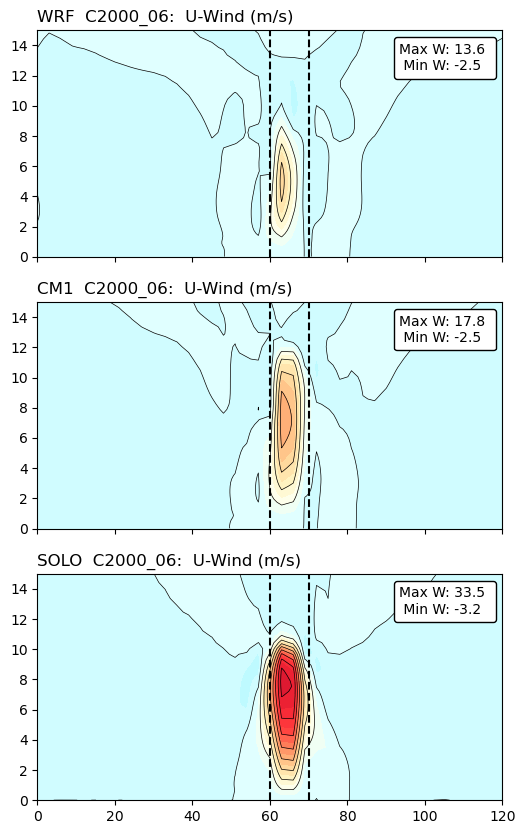

In [4]:
#plot_filename = "%s.%s" % (plot_prefix, output_format)

fig, axes = plt.subplots(3, 1, sharey=True, sharex=True, figsize=(6,10))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
# ax4 = axes[1,1]
# ax5 = axes[2,0]
# ax6 = axes[2,1]

time = 2

allcape = ("C2000",)
allshear = ("06",)

for cape in allcape:

    for shear in allshear:   # create dictionary names
            
            label = "%s_%s" % (cape, shear)
            
            
            for n, key in enumerate(models):
                
                if key == 'solo':
                    mdata = models[key][label]['w'][time-1,:,128,:]
                else:
                    mdata = models[key][label]['w'][time,:,128,:]
                
                x = 3.0*np.arange(mdata.shape[1])
                y = zh

                clevels = np.arange(-40.,40.,2.)
                #mdata = np.clip(mdata, -20, 20.)
                plot    = axes[n].contourf(x,y, mdata, clevels, cmap=ctables.Not_PosDef_Default)
                #   cbar    = ax1.colorbar(plot,location='right',pad="5%")
                #   cbar.set_label("U")
                plot    = axes[n].contour(x, y, mdata, clevels[::2], colors='k', linewidths=0.5)
                title   = ("%s  %s:  U-Wind (m/s)" % (key.upper(),label))
                axes[n].set_title(title, loc='left', fontsize=12)
                axes[n].set_xlim(00.0,120.)
                axes[n].set_ylim(00.0,15.)
                # start, end = ax1.get_xlim()
                # #   ax1.xaxis.set_ticks(N.arange(start, end+6, 6))
                # ax1.xaxis.set_ticks(np.arange(start, end+11, 10))
                # ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
                # start, end = ax1.get_ylim()
                # ax1.yaxis.set_ticks(np.arange(start, end, 2))
                # ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
                axes[n].axvline(x=60.0, color='k', linestyle='--')
                axes[n].axvline(x=70.0, color='k', linestyle='--')

                at = AnchoredText("Max W: %4.1f \n Min W: %4.1f" % (mdata.max(),mdata.min()), loc=1, prop=dict(size=10), frameon=True,)
                at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
                axes[n].add_artist(at)